In [1]:
import pandas as pd

from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

##### Raw data in dict form, paste into a variable and convert to Dataframe

data_dict = {'Condition #': {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11}, 'Note': {0: 'a0', 1: '0A', 2: '+-', 3: 'A0', 4: '0a', 5: '00', 6: '--', 7: '++', 8: '-+', 9: '00', 10: 'control'}, 'Balanced Feed': {0: 1.5, 1: 3.0, 2: 0.0, 3: 1.5, 4: 0.0, 5: 1.5, 6: 0.0, 7: 3.0, 8: 3.0, 9: 1.5, 10: 1.0}, 'Feed Supplement': {0: 0.0, 1: 1.5, 2: 3.0, 3: 3.0, 4: 1.5, 5: 1.5, 6: 0.0, 7: 3.0, 8: 0.0, 9: 1.5, 10: 1.0}, 'Titer (Replicate #1)': {0: 1490.9, 1: 3686.5, 2: 1100.3, 3: 1031.1, 4: 1723.0, 5: 3502.3, 6: 1565.8, 7: 1151.3, 8: 1471.7, 9: 2578.2, 10: 1995.8}, 'Titer (Replicate #2)': {0: 1553.3, 1: 3192.7, 2: 1064.4, 3: 1050.2, 4: 1652.6, 5: 2897.3, 6: 1642.6, 7: 1171.9, 8: 1399.1, 9: 2588.8, 10: 1867.9}, 'Average': {0: 1522.1, 1: 3439.6, 2: 1082.35, 3: 1040.65, 4: 1687.8, 5: 3199.8, 6: 1604.2, 7: 1161.6, 8: 1435.4, 9: 2583.5, 10: 1931.85}, 'Range ': {0: 62.4, 1: 493.8, 2: 35.9, 3: 19.1, 4: 70.4, 5: 605.0, 6: 76.8, 7: 20.6, 8: 72.6, 9: 10.6, 10: 127.9}, 'Percent diff': {0: 4.099599238, 1: 14.356320499999999, 2: 3.3168568389999997, 3: 1.8353913419999999, 4: 4.1711103210000005, 5: 18.90743171, 6: 4.787432988, 7: 1.773415978, 8: 5.057823603, 9: 0.41029611, 10: 6.620596837000001}}

In [3]:
data_dict = {'Condition #': {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11}, 'Note': {0: 'a0', 1: '0A', 2: '+-', 3: 'A0', 4: '0a', 5: '00', 6: '--', 7: '++', 8: '-+', 9: '00', 10: 'control'}, 'Balanced Feed': {0: 1.5, 1: 3.0, 2: 0.0, 3: 1.5, 4: 0.0, 5: 1.5, 6: 0.0, 7: 3.0, 8: 3.0, 9: 1.5, 10: 1.0}, 'Feed Supplement': {0: 0.0, 1: 1.5, 2: 3.0, 3: 3.0, 4: 1.5, 5: 1.5, 6: 0.0, 7: 3.0, 8: 0.0, 9: 1.5, 10: 1.0}, 'Titer (Replicate #1)': {0: 1490.9, 1: 3686.5, 2: 1100.3, 3: 1031.1, 4: 1723.0, 5: 3502.3, 6: 1565.8, 7: 1151.3, 8: 1471.7, 9: 2578.2, 10: 1995.8}, 'Titer (Replicate #2)': {0: 1553.3, 1: 3192.7, 2: 1064.4, 3: 1050.2, 4: 1652.6, 5: 2897.3, 6: 1642.6, 7: 1171.9, 8: 1399.1, 9: 2588.8, 10: 1867.9}, 'Average': {0: 1522.1, 1: 3439.6, 2: 1082.35, 3: 1040.65, 4: 1687.8, 5: 3199.8, 6: 1604.2, 7: 1161.6, 8: 1435.4, 9: 2583.5, 10: 1931.85}, 'Range ': {0: 62.4, 1: 493.8, 2: 35.9, 3: 19.1, 4: 70.4, 5: 605.0, 6: 76.8, 7: 20.6, 8: 72.6, 9: 10.6, 10: 127.9}, 'Percent diff': {0: 4.099599238, 1: 14.356320499999999, 2: 3.3168568389999997, 3: 1.8353913419999999, 4: 4.1711103210000005, 5: 18.90743171, 6: 4.787432988, 7: 1.773415978, 8: 5.057823603, 9: 0.41029611, 10: 6.620596837000001}}

In [4]:
df_SFPM07 = pd.DataFrame(data_dict)
print(df_SFPM07.dtypes)

Condition #               int64
Note                     object
Balanced Feed           float64
Feed Supplement         float64
Titer (Replicate #1)    float64
Titer (Replicate #2)    float64
Average                 float64
Range                   float64
Percent diff            float64
dtype: object


### Simple Linear Regression

#### Following Example from: https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [24]:
####### Data preparation ##########

file = 'https://aegis4048.github.io/downloads/notebooks/sample_data/unconv_MV_v5.csv'
df = pd.read_csv(file)

X = df['Por'].values.reshape(-1,1) #one column of values, unlimited rows
y = df['Prod'].values #one dimensional dataset


In [31]:
############ Train ###########    
ols = linear_model.LinearRegression()
model = ols.fit(X, y)
response = model.predict(X)

In [46]:
######### Evaluate #######
r2 = model.score(X, y)
print("Rsquared: " + str(r2))
print("Coefficient: " + str(model.coef_))
print("Intercept: " + str(model.intercept_))

Rsquared: 0.7428880535051594
Coefficient: [287.78074285]
Intercept: -2.9444310537155616


Text(0.5, 0, 'Porosity (%)')

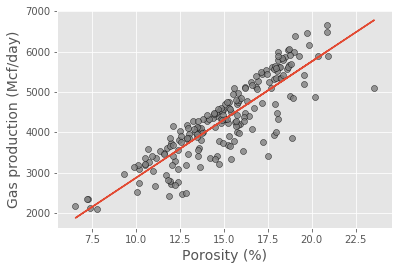

In [30]:
######### Plot ##########
plt.style.use('ggplot')

fig, ax = plt.subplots()

ax.plot(X, response)
ax.scatter(X,y, edgecolor = "k", facecolor = "grey", alpha = 0.8)

ax.set_ylabel('Gas production (Mcf/day)', fontsize=14)
ax.set_xlabel('Porosity (%)', fontsize=14)

### Exploring statsmodels for Results Summary

"There exists no R type regression summary report in sklearn. The main reason is that sklearn is used for predictive modelling / machine learning and the evaluation criteria are based on performance on previously unseen data (such as predictive r^2 for regression)."

statsmodels is a more classical approach to obtaining a summary table 

In [12]:
import statsmodels.formula.api as sm

In [36]:
ones = np.ones((200,1))

In [39]:
X_new = np.concatenate((ones,X), axis = 1) #need a column of ones to make an intercept

In [40]:
X_new.shape

(200, 2)

In [42]:
sm_OLS = sm.OLS(y,X_new)
results = sm_OLS.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     572.1
Date:                Wed, 21 Oct 2020   Prob (F-statistic):           2.62e-60
Time:                        09:08:59   Log-Likelihood:                -1527.4
No. Observations:                 200   AIC:                             3059.
Df Residuals:                     198   BIC:                             3065.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9444    183.861     -0.016      0.9

In [ ]:
Rsquared: 0.7428880535051594
Coefficient: [287.78074285]
Intercept: -2.9444310537155616

#### Exploring SciKit Learn Polynomial Feature

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X = df.iloc[:,1:3].values

In [ ]:
names = df.columns[1:3].values

In [ ]:
poly = PolynomialFeatures(2)

In [ ]:
poly.fit_transform(X)

In [ ]:
poly.get_feature_names(names)

In [ ]:
X.shape

In [ ]:
df[["Por", "Perm"]]

In [ ]:
X = df[["Por","Perm"]]

In [ ]:
X

sci-kit Learn polynomial feature

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [ ]:
response.shape

In [ ]:
y.shape

In [ ]:
df.isnull().sum()

### Following Example from: https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python

In [ ]:
#A quick look at the plot structure

x = df_SFPM07["Balanced Feed"]
y = df_SFPM07["Feed Supplement"]
z = df_SFPM07["Average"]

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(x, y, z, cmap = "Greens")

In [ ]:
X = df_SFPM07[["Balanced Feed", "Feed Supplement"]].values.reshape(-1,2) 
Y = df_SFPM07["Average"]

In [ ]:
x = X[:, 0]
y = X[:, 1]
z = Y

In [ ]:
x_pred = np.linspace(0, 4, 20)
y_pred = np.linspace(0, 4, 20)  
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

In [ ]:
ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

In [ ]:
r2 = model.score(X, Y)

In [ ]:
plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('BF1', fontsize=12)
    ax.set_ylabel('FS', fontsize=12)
    ax.set_zlabel('Titer (mg/L)', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

#ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
#           transform=ax1.transAxes, color='grey', alpha=0.5)
#ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
#           transform=ax2.transAxes, color='grey', alpha=0.5)
#ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
#           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()
fig.savefig("Feeds_Regression.png", dpi = 500)

### Modifying the above example with FS*2 column

In [ ]:
df_SFPM07["FS*FS"] = df_SFPM07["Feed Supplement"]*df_SFPM07["Feed Supplement"]

In [ ]:
X = df_SFPM07[["Balanced Feed", "Feed Supplement", "FS*FS"]].values.reshape(-1,3) 
Y = df_SFPM07["Average"]

In [ ]:
ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
#predicted = model.predict(model_viz)

In [ ]:
model.intercept_

In [ ]:
model.coef_

In [ ]:
r2 = model.score(X,Y)

In [ ]:
################################## Manually obtaining Predicted Value ##############################


x_pred = np.linspace(0, 4, 20)
y_pred = np.linspace(0, 4, 20)  
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

In [ ]:
model_viz.shape

In [ ]:
new = np.add?

In [ ]:
new = np.add

In [ ]:
new = np.add(model_viz[:,0], model_viz[:,0])

In [ ]:
new = model_viz[:,0]*203.1633 + model_viz[:,1]*1634.4083 + (np.multiply(model_viz[:,1],model_viz[:,1])*(-585.94649)) + 1178.88399

In [ ]:
new.shape

In [ ]:
plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), new, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('BF1', fontsize=12)
    ax.set_ylabel('FS', fontsize=12)
    ax.set_zlabel('Titer (mg/L)', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

#ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
#           transform=ax1.transAxes, color='grey', alpha=0.5)
#ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
#           transform=ax2.transAxes, color='grey', alpha=0.5)
#ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
#           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()
fig.savefig("Feeds_Regression.png", dpi = 500)

# Appendix

### Exploring numpy.reshape

In [ ]:
x = df_SFPM07["Balanced Feed"]
x_val = df_SFPM07["Balanced Feed"].values
x_val_1 = df_SFPM07["Balanced Feed"].values.reshape(-1,1)


print(type(x))
print("shape is : " + str(x.shape))
print(x)
print("\n")

print(type(x_val))
print(x_val.shape)
print(x_val)
print("\n")

print(type(x_val_1))
print("Shape is: " + str(x_val_1.shape))
print(x_val_1)